# **Hospital Service Area**

## Medicare Inpatient Hospital Fee-for-Service Claims Data

* The Hospital Service Area data is a summary of calendar year Medicare inpatient hospital fee-for-service claims data. 
* It contains number of discharges, total days of care, and total charges summarized by hospital provider number and the ZIP code of the Medicare beneficiary for the fiscal year of 2021. 
* The data was obtained from CMS.

#### Key Terms
* Medicare - Medicare is the federal health insurance program for:
    * People who are 65 or older
    * Certain younger people with disabilities
    * People with End-Stage Renal Disease (permanent kidney failure requiring dialysis or a transplant, sometimes called ESRD)

* Fee-for-service - Fee-for-service is a system of health care payment in which a provider is paid separately for each particular service rendered.
    * Original Medicare is an example of fee-for-service coverage, and there are Medicare Advantage plans that also operate on a fee-for-service basis.
    * Original Medicare is a fee-for-service health plan that has two parts: Part A (Hospital Insurance) and Part B (Medical Insurance). 
    * In this analysis we will focus only in part A (Hospital Insurance) inpatient fee-for-service claims.
* CMS - Centers for Medicare & Medicaid Services
    * The Centers for Medicare & Medicaid Services is part of the Department of Health and Human Services (HHS). 
    * It is the federal agency that runs the Medicare, Medicaid, and Children's Health Insurance Programs, and the federally facilitated Marketplace.

#### Data sources
* [Fee-for-Service Claims](https://data.cms.gov/provider-summary-by-type-of-service/medicare-inpatient-hospitals/hospital-service-area)
* [US zip codes' latitudes and longitudes](https://simplemaps.com/data/us-zips)

#### Importing libraries and data

In [1]:
# Importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib as mpl

In [2]:
# Reading in the data
df = pd.read_csv(r'..\Medicare_Inpatient_Claims\Hospital_Service_Area_2021.csv', low_memory=False)
zipdf = pd.read_excel(r'..\Medicare_Inpatient_Claims\uszips.xlsx')

#### Cleaning and modifying data to merge dataframes

In [3]:
# Cleaning the data of "*" values
df = df[(df.TOTAL_DAYS_OF_CARE != "*") & (df.TOTAL_CHARGES != "*") &(df.TOTAL_CASES != "*") ]
KYdf = zipdf[zipdf.state_id == "KY"]

In [4]:
# Converting the data to string to merge
KYdf['zip'] = KYdf['zip'].astype(str)

# Changing the column names to merge
df.columns = ['Medicare_CCN', 'zip', 'Total_days',
       'Total_charges', 'Total_cases']

# CCN = CMS Certification Number

C:\Users\Jesus\AppData\Local\Temp\ipykernel_24036\2879478211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KYdf['zip'] = KYdf['zip'].astype(str)


In [5]:
# Merging the data
df1 = df.merge(KYdf, on='zip')

In [6]:
# Converting the data to numeric
df1['Total_days'] = df1['Total_days'].astype(int)
df1['Total_charges'] = df1['Total_charges'].astype(int)
df1['Total_cases'] = df1['Total_cases'].astype(int)


In [7]:
# Viewing the merged dataframe
df1

Medicare_CCN    zip  Total_days  Total_charges  Total_cases       lat  \
0          180012  42784         644        4616131          116  37.45030   
1          183028  42784         110         241588           11  37.45030   
2          180012  42782          37         502685           11  37.34475   
3          180087  42782          97         561464           15  37.34475   
4          180012  42776         536        3827326          101  37.51577   
...           ...    ...         ...            ...          ...       ...   
2219       182001  40004         251        1912806           11  37.80279   
2220       183028  40004         305         664996           27  37.80279   
2221       180040  40003          99        1442160           11  38.26863   
2222       180088  40003         116        1793644           17  38.26863   
2223       180127  40003         125        1260939           16  38.26863   

           lng          city state_id state_name  ...  population  density  \
0    -85.92272         Upton       KY   Kentucky  ...      2071.0     12.1   
1    -85.92272         Upton       KY   Kentucky  ...      2071.0     12.1   
2    -85.63702  Summersville       KY   Kentucky  ...       721.0      8.3   
3    -85.63702  Summersville       KY   Kentucky  ...       721.0      8.3   
4    -85.91834        Sonora       KY   Kentucky  ...      2632.0     15.4   
...        ...           ...      ...        ...  ...         ...      ...   
2219 -85.46950     Bardstown       KY   Kentucky  ...     29892.0     79.4   
2220 -85.46950     Bardstown       KY   Kentucky  ...     29892.0     79.4   
2221 -85.04367        Bagdad       KY   Kentucky  ...      2012.0     17.9   
2222 -85.04367        Bagdad       KY   Kentucky  ...      2012.0     17.9   
2223 -85.04367        Bagdad       KY   Kentucky  ...      2012.0     17.9   

      county_fips  county_name  \
0           21099         Hart   
1           21099         Hart   
2           21087        Green   
3           21087        Green   
4           21093       Hardin   
...           ...          ...   
2219        21179       Nelson   
2220        21179       Nelson   
2221        21211       Shelby   
2222        21211       Shelby   
2223        21211       Shelby   

                                       county_weights   county_names_all  \
0     {"21099": 39.47, "21093": 36.33, "21123": 24.2}  Hart|Hardin|Larue   
1     {"21099": 39.47, "21093": 36.33, "21123": 24.2}  Hart|Hardin|Larue   
2                    {"21087": 87.17, "21099": 12.83}         Green|Hart   
3                    {"21087": 87.17, "21099": 12.83}         Green|Hart   
4                    {"21093": 69.11, "21123": 30.89}       Hardin|Larue   
...                                               ...                ...   
2219                                   {"21179": 100}             Nelson   
2220                                   {"21179": 100}             Nelson   
2221                    {"21211": 92.6, "21073": 7.4}    Shelby|Franklin   
2222                    {"21211": 92.6, "21073": 7.4}    Shelby|Franklin   
2223                    {"21211": 92.6, "21073": 7.4}    Shelby|Franklin   

        county_fips_all imprecise military          timezone  
0     21099|21093|21123     False    False   America/Chicago  
1     21099|21093|21123     False    False   America/Chicago  
2           21087|21099     False    False   America/Chicago  
3           21087|21099     False    False   America/Chicago  
4           21093|21123     False    False  America/New_York  
...                 ...       ...      ...               ...  
2219              21179     False    False  America/New_York  
2220              21179     False    False  America/New_York  
2221        21211|21073     False    False  America/New_York  
2222        21211|21073     False    False  America/New_York  
2223        21211|21073     False    False  America/New_York  

[2224 rows x 22 columns]

#### Creating visualizations
* Interactive map of the United States depicting the total charges of Medicare providers.
* Each Medicare provider has a zip code assigned
* After merging both dataframes each zip code has their latitudes and longitudes
* So we can represent each provider spatially in a map.
* I represent only the Medicare providers established in the state of Kentucky because is where I live.

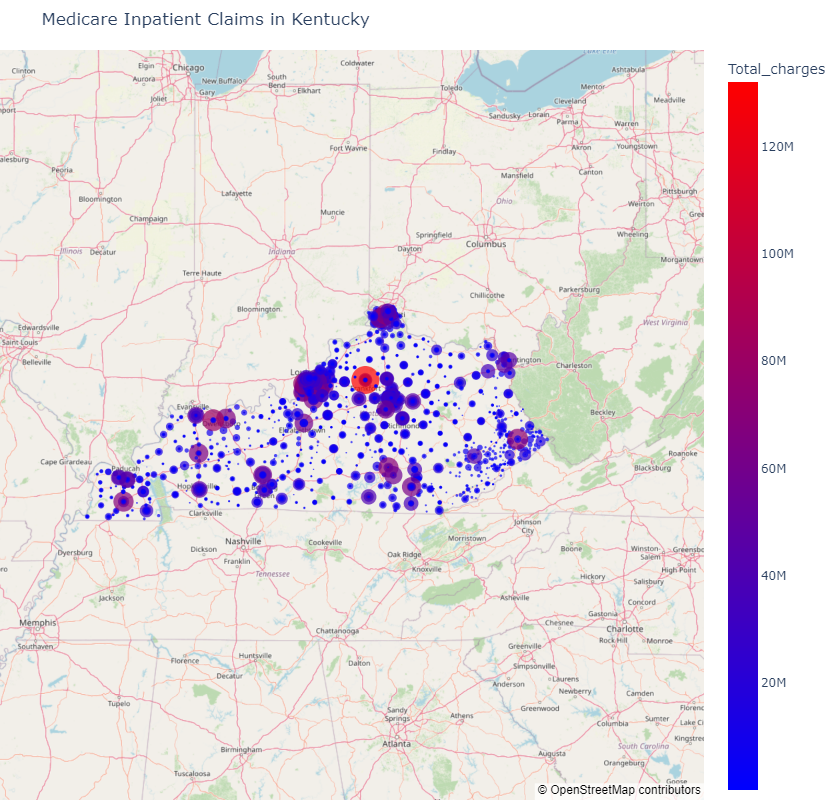

In [8]:
color_scale = [(0, 'blue'), (1,'red')]

fig = px.scatter_mapbox(df1,
                        lat="lat", 
                        lon="lng",
                        hover_name="city", 
                        hover_data=["Total_charges", "Total_cases", "Total_days"],
                        color="Total_charges",
                        color_continuous_scale=color_scale,
                        size="Total_charges",
                        zoom=5.5, 
                        height=800,
                        width=800,
                        title="Medicare Inpatient Claims in Kentucky")

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

#### Visualization of charges by city
* Creating a plot to see what are the top 10 cities in Kentucky with the highest charges

Text(0.5, 1.0, 'Total Charges by City')

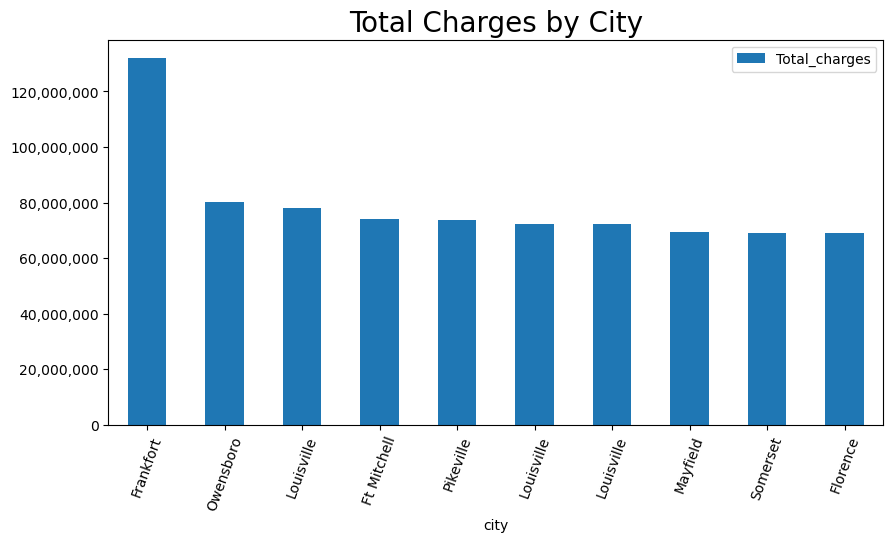

In [9]:
# Sort the data by Total_charges and create a bar graph of the top 10 cities
ax = df1.sort_values('Total_charges', ascending=False).head(10).plot.bar(
    x='city', y='Total_charges', rot=70,figsize=(10,5))

# Changing the scientific e notation in the y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Total Charges by City", fontsize=20)


#### Visualization of sum charges 
* Different Medicare providers can operate in the same area. That's why the previous plot depicted several providers in the area of Louisville 
* I am interested in knowing the highest charges in each area.
* For that reason I sum all charges that are located in the same area, that way I can see the top 10 different areas with the highest charges

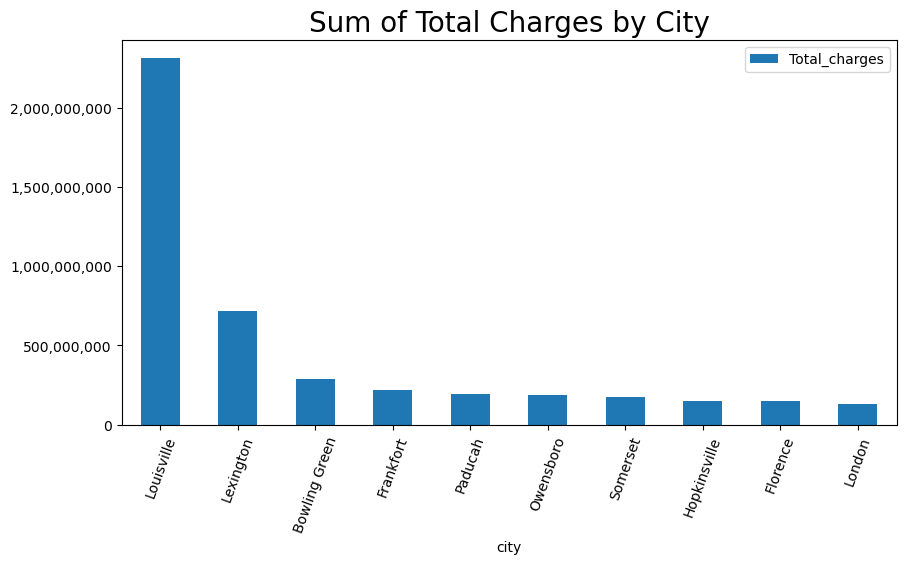

In [10]:
# Create a new dataframe grouping by city and summing the Total charges
df_by_city = df1.groupby('city',as_index=False)['Total_charges'].sum()

# Eliminating e notation from the data
pd.set_option('display.float_format', '{:.0f}'.format)

# Creating a sorted bar graph of Total_charges grouped by city
ax = df_by_city.sort_values('Total_charges', ascending=False).head(10).plot.bar(
    x='city', y='Total_charges', rot=70,figsize=(10,5))
plt.title("Sum of Total Charges by City", fontsize=20)

# Elimminating the scientific notation in the y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

#### Visualization of sum cases
* The same way that I summed the total charges in each city, now I sum all claim cases by city
* I want to see if the cities with the highest charges also have the highest number of cases

Text(0.5, 1.0, 'Sum of Total Cases by City')

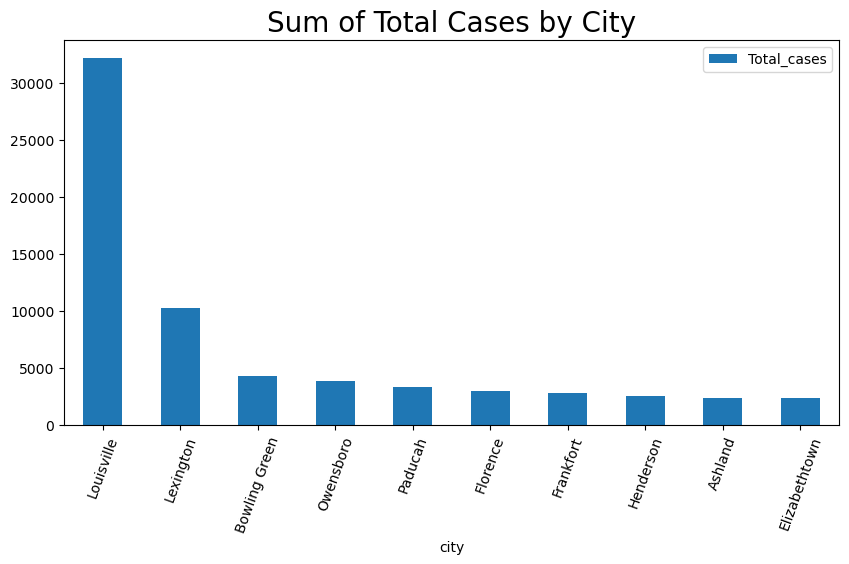

In [11]:
# Create a new dataframe grouping by city and summing the Total cases
df_by_cases = df1.groupby('city', as_index=False)['Total_cases'].sum()

# Creating a sorted bar graph of Total_cases grouped by city
ax = df_by_cases.sort_values('Total_cases', ascending=False).head(10).plot.bar(
    x='city', y='Total_cases', rot=70,figsize=(10,5))
plt.title("Sum of Total Cases by City", fontsize=20)

#### Comparison of charges and cases
* There is not a correlation of charges and cases for every city.
* In the last plot the top 3 cities (Lousville, Lexington, and Bowling Green) have a correlation between charges and cases
* However, the rest of places differ in that correlation
* Because it is more difficult to compare the cases and charges bargraphs in different plots, I create one bar graph with charges and cases amount side by side of the 10 top cities.
* The first graph will compare the top 10 cities with the highest charges to the number of cases
* The second graph will compare the top 10 cities with the highest cases to the charges amount

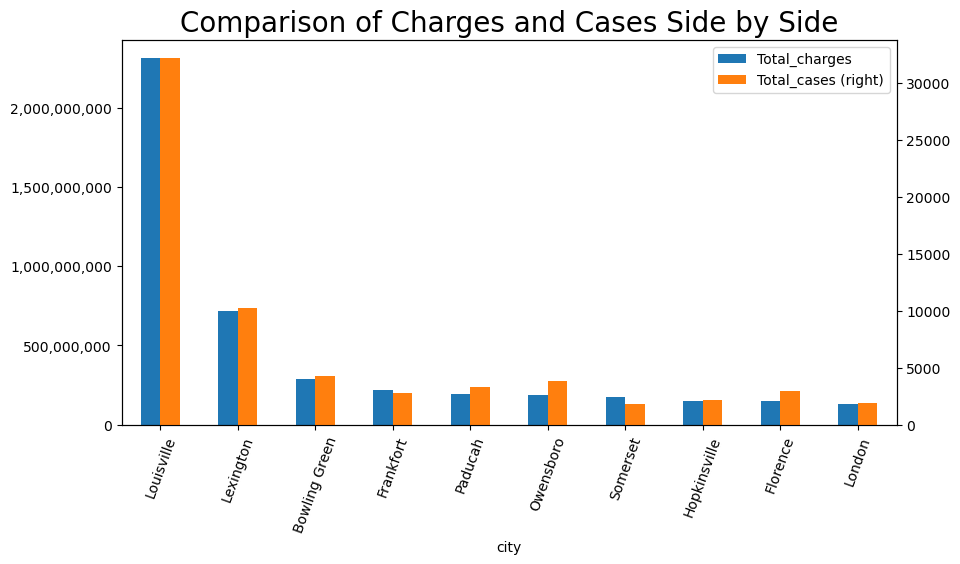

In [28]:
# Mergin grouped dataframes to create a bar graph plot with cases and charges side by side
df3 = df_by_city.merge(df_by_cases, on='city')

# Creating a sorted bar graph of Total_charges and Total_cases grouped by city side by side
fig, ax = plt.subplots()
ax = df3.sort_values('Total_charges', ascending=False).head(10).plot.bar(
    x='city', secondary_y='Total_cases', rot=70,figsize=(10,5), ax = ax)
plt.title("Comparison of Charges and Cases Side by Side", fontsize=20)

# Changing the scientific e notation in the y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

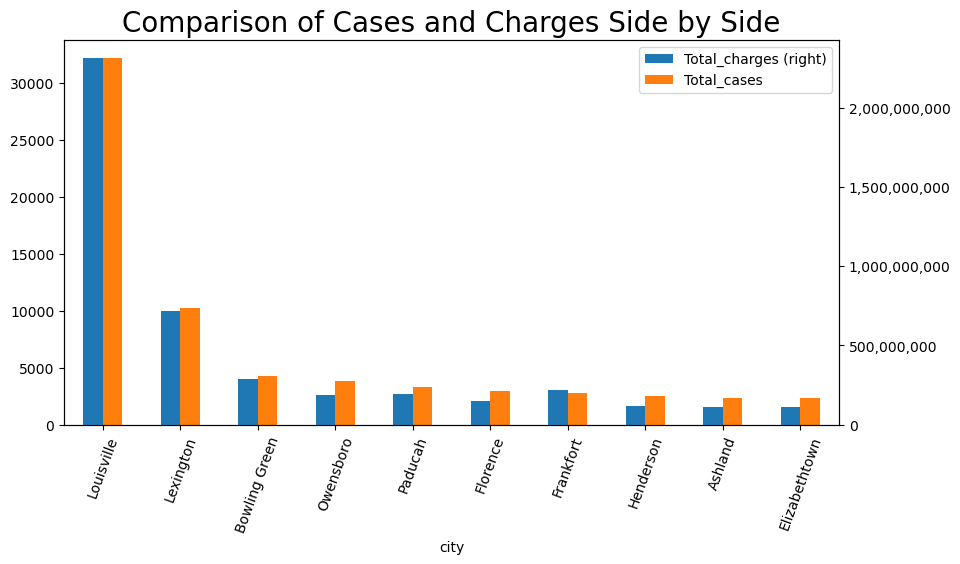

In [39]:
# Creating a sorted bar graph of Total_cases and Total_charges grouped by city side by side
fig, ax = plt.subplots()
ax = df3.sort_values('Total_cases', ascending=False).head(10).plot.bar(
    x='city', secondary_y='Total_charges', rot=70,figsize=(10,5), ax = ax)
plt.title("Comparison of Cases and Charges Side by Side", fontsize=20)

# Changing the scientific e notation in the y axis
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [ ]:
import numpy as np

df3['city'] = df3['city'].astype(str)
df3['Total_charges'] = df3['Total_charges'].astype(float)
df3['Total_cases'] = df3['Total_cases'].astype(float)

x = df3['city'].iloc[0:9]
y = df3['Total_charges'].iloc[0:9]
y2 = df3['Total_cases'].iloc[0:9]

#y = y1,y2,y3,y4

ax1 = plt.plot(x,y, 'o')
ax2 = plt.plot(x,y2, 'o')

m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x+b)

In [ ]:
#df.to_excel(r'C:\Users\Jesus\Desktop\KYdf.xlsx', index = False)
#df.loc[df['ZIP_CD_OF_RESIDENCE'] == '42784']
#KYdf.loc[KYdf['zip'] == 42784]

In [40]:
#pd.reset_option("all")
#pd.set_option('display.max_rows', None)
# Select rows based on column value
#df1.loc[df1['city'] == 'Louisville']